In [3]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt
import cv2

In [4]:
dataset_path = "D:\ML-FINALS\Primary Data"
image_dir = os.path.join(dataset_path, "images")


In [5]:
folder_path = r"D:\ML-FINALS\Primary Data\Primary Data"
files = os.listdir(folder_path)

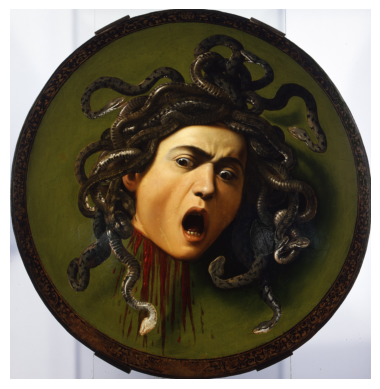

In [6]:
image_path = r"D:\ML-FINALS\Primary Data\Primary Data\Baroque\186670.jpg"
# Display the image using the displayImage function 


img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print(tf.config.list_physical_devices('GPU'))


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13079091737600134409
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10057940992
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11581914406432380970
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
# Check if TensorFlow can access the GPU
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print(f"TensorFlow is using GPU: {physical_devices[0]}")
else:
    print("No GPU available.")

TensorFlow is using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [9]:
# SIZE = 256
# image_size = (SIZE, SIZE)

In [10]:
# # Initialize lists to store data
# X = []
# y_class = []
# class_ids = set()

# for art_style in os.listdir(folder_path):
#     style_path = os.path.join(folder_path, art_style)
#     if not os.path.isdir(style_path):
#         continue

#     print(f"Processing folder: {art_style}")
#     class_ids.add(art_style)  # Use art_style folder name as class

#     for filename in os.listdir(style_path):
#         if filename.lower().endswith((".jpg", ".jpeg", ".png")):
#             image_path = os.path.join(style_path, filename)

#             img = cv2.imread(image_path)
#             if img is None:
#                 print(f"Warning: Could not load image {image_path}")
#                 continue

#             # Resize and normalize image
#             img = cv2.resize(img, image_size)
#             img = img / 255.0

#             X.append(img)
#             y_class.append(art_style)

# X = np.array(X, dtype=np.float32)


In [11]:
base_dir = r"D:\ML-FINALS\Primary Data\Primary Data"

In [12]:
styles = os.listdir(base_dir)
print(styles) # Print the list of styles to verify

['Academic_Art', 'Art_Nouveau', 'Baroque', 'Expressionism', 'Japanese_Art', 'Neoclassicism', 'Primitivism', 'Realism', 'Renaissance', 'Rococo', 'Romanticism', 'Symbolism', 'Western Medieval']


In [13]:
images = []
labels = []
base_dir = folder_path  # Use the existing folder_path variable
for style in files:  # Use the existing files variable which contains the art styles
    style_dir = os.path.join(base_dir, style)
    for image_name in os.listdir(style_dir):
        image_path = os.path.join(style_dir, image_name)
        try:
            img = Image.open(image_path).convert('RGB') # Load image and convert to RGB
            img = img.resize((128, 128)) # Resize images to a consistent size
            img_array = np.array(img)
            images.append(img_array)
            labels.append(style) # Use the style name as the label
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")

images = np.array(images)

c:\Users\Coli\miniconda3\envs\py310\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Coli\miniconda3\envs\py310\lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (96714256 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\Coli\miniconda3\envs\py310\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


In [14]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.66, random_state=42)

In [15]:
# Convert y_train to a NumPy array to use NumPy functions
y_train_np = np.array(y_train)

# Get unique values and their counts
unique_elements, counts = np.unique(y_train_np, return_counts=True)

# Print the counts
print("Counts of each style in y_train:")
for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")
     

Counts of each style in y_train:
Academic_Art: 707
Art_Nouveau: 697
Baroque: 688
Expressionism: 687
Japanese_Art: 697
Neoclassicism: 688
Primitivism: 704
Realism: 703
Renaissance: 682
Rococo: 701
Romanticism: 697
Symbolism: 731
Western Medieval: 718


In [16]:
y_val_np = np.array(y_val)

# Get unique values and their counts
unique_elements, counts = np.unique(y_val_np, return_counts=True)

# Print the counts
print("Counts of each style in y_val:")
for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

Counts of each style in y_val:
Academic_Art: 93
Art_Nouveau: 111
Baroque: 105
Expressionism: 119
Japanese_Art: 98
Neoclassicism: 88
Primitivism: 113
Realism: 102
Renaissance: 110
Rococo: 102
Romanticism: 115
Symbolism: 96
Western Medieval: 74


In [17]:
label_to_index = {style: i for i, style in enumerate(styles)}
y_train_encoded = to_categorical([label_to_index[label] for label in y_train], num_classes=len(styles))
y_val_encoded = to_categorical([label_to_index[label] for label in y_val], num_classes=len(styles))
y_test_encoded = to_categorical([label_to_index[label] for label in y_test], num_classes=len(styles))

# Normalize the image data after splitting
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [18]:
model = tf.keras.Sequential([
    # First block
    tf.keras.layers.Conv2D(32, 3, activation="relu", input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),
    
    # Second block
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),
    
    # Third block
    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.GlobalAveragePooling2D(),
    
    # Dense layers
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(styles), activation="softmax")
])


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [20]:
from tensorflow.keras.callbacks import EarlyStopping


In [21]:
# Initialize a more efficient learning rate
initial_learning_rate = 0.0001

optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
    metrics=['accuracy']
)

In [22]:
early_stop = EarlyStopping(
    monitor='val_accuracy',  
    patience=20,             
    restore_best_weights=True,
    verbose=1,
    min_delta=0.0001,         

)

In [23]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.6, patience=10, min_lr=1e-8, min_delta=0.0001, verbose=1)

In [24]:
# Fit the model
history = model.fit(
    X_train, y_train_encoded, # Use the one-hot encoded training labels
    epochs=100,
    validation_data=(X_val, y_val_encoded), # Use the one-hot encoded validation labels
    callbacks=[early_stop, reduce_lr],
    batch_size=32,
    verbose=1
)

Epoch 1/100


c:\Users\Coli\miniconda3\envs\py310\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


285/285 [==============================] - 15s 23ms/step - loss: 2.4997 - accuracy: 0.1315 - val_loss: 2.4415 - val_accuracy: 0.1727 - lr: 0.0010
Epoch 2/100
285/285 [==============================] - 6s 22ms/step - loss: 2.3958 - accuracy: 0.1875 - val_loss: 2.3137 - val_accuracy: 0.2345 - lr: 0.0010
Epoch 3/100
285/285 [==============================] - 6s 21ms/step - loss: 2.3494 - accuracy: 0.2266 - val_loss: 2.2954 - val_accuracy: 0.2587 - lr: 0.0010
Epoch 4/100
285/285 [==============================] - 6s 21ms/step - loss: 2.3164 - accuracy: 0.2367 - val_loss: 2.3035 - val_accuracy: 0.2481 - lr: 0.0010
Epoch 5/100
285/285 [==============================] - 6s 20ms/step - loss: 2.2926 - accuracy: 0.2477 - val_loss: 2.2896 - val_accuracy: 0.2692 - lr: 0.0010
Epoch 6/100
285/285 [==============================] - 6s 21ms/step - loss: 2.2686 - accuracy: 0.2598 - val_loss: 2.2594 - val_accuracy: 0.2489 - lr: 0.0010
Epoch 7/100
285/285 [==============================] - 6s 20ms/step -

In [25]:
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

0.6339560151100159
0.5460030436515808


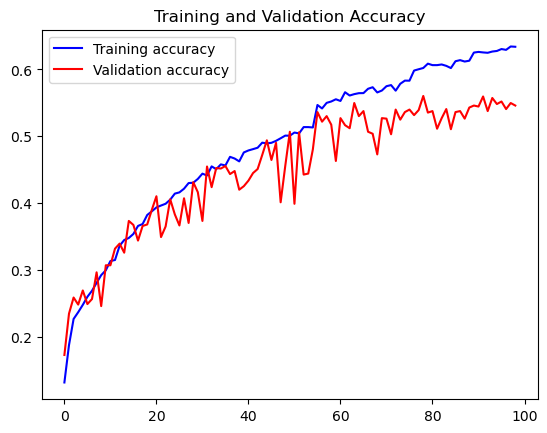

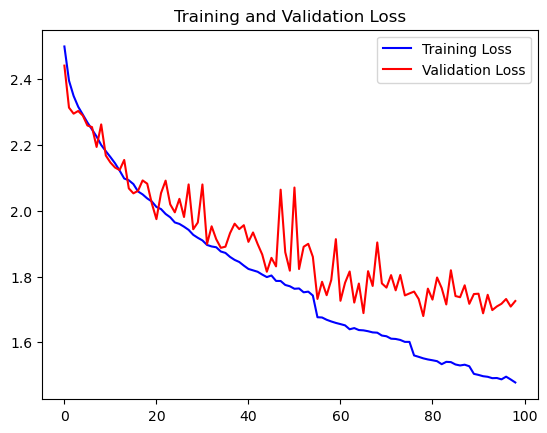

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [28]:
model.evaluate(X_test, y_test_encoded)

81/81 [==============================] - 1s 6ms/step - loss: 1.7020 - accuracy: 0.5357


[1.7019771337509155, 0.5357420444488525]

In [30]:
# Print Classification Report. Print which number represents which art style
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = [label_to_index[label] for label in y_test]
print(classification_report(y_test_classes, y_pred_classes, target_names=styles))

81/81 [==============================] - 0s 5ms/step
                  precision    recall  f1-score   support

    Academic_Art       0.42      0.57      0.48       200
     Art_Nouveau       0.77      0.50      0.61       192
         Baroque       0.44      0.50      0.47       207
   Expressionism       0.51      0.54      0.52       194
    Japanese_Art       0.84      0.76      0.80       205
   Neoclassicism       0.68      0.60      0.64       224
     Primitivism       0.66      0.64      0.65       183
         Realism       0.48      0.44      0.46       195
     Renaissance       0.42      0.43      0.43       208
          Rococo       0.38      0.58      0.46       197
     Romanticism       0.54      0.39      0.45       188
       Symbolism       0.36      0.24      0.29       173
Western Medieval       0.65      0.70      0.67       208

        accuracy                           0.54      2574
       macro avg       0.55      0.53      0.53      2574
    weighted avg 

In [ ]:
model.save('model.keras')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Coli\AppData\Local\Temp\tmp5y6kqjht\assets


INFO:tensorflow:Assets written to: C:\Users\Coli\AppData\Local\Temp\tmp5y6kqjht\assets
